Notes:
- Extend embedding to linear readout

# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

In [18]:
Feature_Only = True

# Generate Training Data

In [19]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun: "the_nightmare"

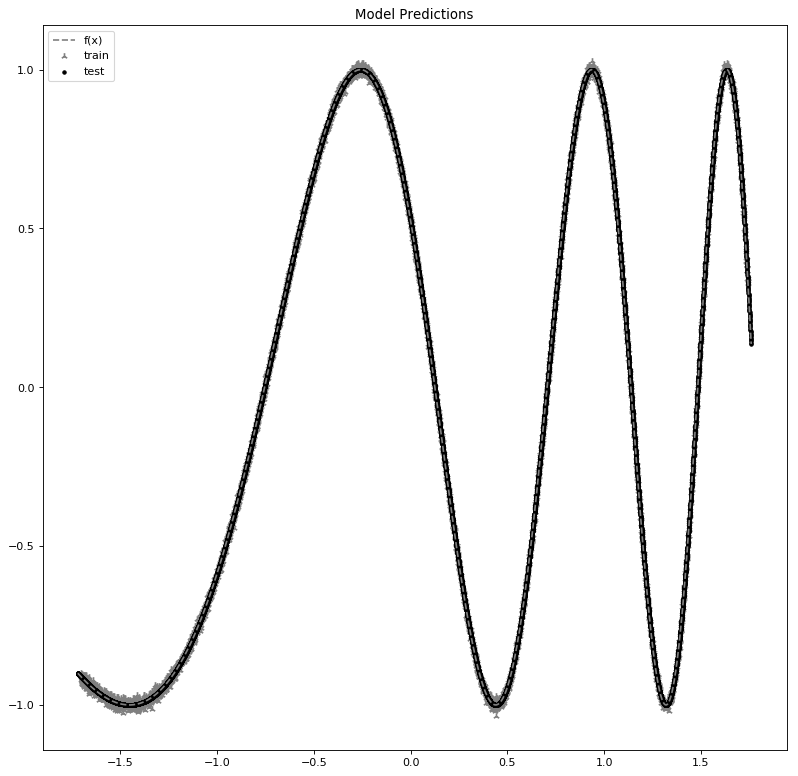

Simulation Confiugration Information:
 
We're plotting the function: oscilatory with 0.01 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 10000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


In [20]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "oscilatory"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [21]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))
factor = 1

robustness_dictionary = {'robustness_parameter': [var_estimate*factor,var_estimate*2*factor,var_estimate*3*factor]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_NEU_Nets = {**param_grid_NEU_Nets,
                       **robustness_dictionary}

param_grid_NEU_Feature_Only_Nets = {**param_grid_NEU_Feature_Only_Nets,
                                    **robustness_dictionary}

NEU_Structure_Dictionary = {**NEU_Structure_Dictionary,
                            **robustness_dictionary}

# NEU OLS Keys
param_grid_NEU_Reg_Nets = {**param_grid_NEU_Nets,
                           **robustness_dictionary}

param_grid_NEU_Reg_Nets.pop('height', None)
param_grid_NEU_Reg_Nets.pop('depth', None)
print(" ")

# Benchmark Models

Run univariate regression benchmarks file:

In [22]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.8s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.9s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.0min finished


Epoch 1/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6771 - mse: 0.5539 - mae: 0.6771 - mape: 110.3808
Epoch 2/100
938/938 [==============================] - 1s 930us/step - loss: 0.6768 - mse: 0.5531 - mae: 0.6768 - mape: 109.2540
Epoch 3/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6764 - mse: 0.5524 - mae: 0.6764 - mape: 108.4403
Epoch 4/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6761 - mse: 0.5517 - mae: 0.6761 - mape: 107.2594
Epoch 5/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6758 - mse: 0.5509 - mae: 0.6758 - mape: 106.4032
Epoch 6/100
938/938 [==============================] - 1s 889us/step - loss: 0.6755 - mse: 0.5503 - mae: 0.6755 - mape: 105.5750
Epoch 7/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6752 - mse: 0.5496 - mae: 0.6752 - mape: 104.4596
Epoch 8/100
938/938 [==============================] - 1s 929us/step - loss: 0.6749 - mse: 0.5490 - mae: 0.

938/938 [==============================] - 1s 1ms/step - loss: 0.6240 - mse: 0.4902 - mae: 0.6240 - mape: 131.1694
Epoch 65/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6220 - mse: 0.4891 - mae: 0.6220 - mape: 132.1048
Epoch 66/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6199 - mse: 0.4881 - mae: 0.6199 - mape: 133.1036
Epoch 67/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6178 - mse: 0.4873 - mae: 0.6178 - mape: 134.3050
Epoch 68/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6158 - mse: 0.4865 - mae: 0.6158 - mape: 135.1695
Epoch 69/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6138 - mse: 0.4860 - mae: 0.6138 - mape: 135.9556
Epoch 70/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6117 - mse: 0.4856 - mae: 0.6117 - mape: 136.9393
Epoch 71/100
938/938 [==============================] - 1s 1ms/step - loss: 0.6098 - mse: 0.4852 - mae: 0.6098 - mape

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [24]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  3.4min finished


Epoch 1/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5970 - mse: 0.5146 - mae: 0.5951 - mape: 168.6648
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5718 - mse: 0.5147 - mae: 0.5717 - mape: 200.0013
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5718 - mse: 0.5134 - mae: 0.5717 - mape: 200.3551
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5702 - mse: 0.5063 - mae: 0.5687 - mape: 197.8036
Epoch 5/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5666 - mse: 0.4919 - mae: 0.5639 - mape: 194.2340
Epoch 6/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5635 - mse: 0.4826 - mae: 0.5603 - mape: 188.8418
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.5625 - mse: 0.4821 - mae: 0.5597 - mape: 186.3400
Epoch 8/100
938/938 [==============================] - 3s 4ms/step - loss: 0.5618 - mse: 0.4793 - mae: 0.5594 -

938/938 [==============================] - 3s 3ms/step - loss: 0.5575 - mse: 0.4802 - mae: 0.5567 - mape: 193.5202
Epoch 66/100
938/938 [==============================] - 4s 4ms/step - loss: 0.5550 - mse: 0.4777 - mae: 0.5543 - mape: 188.1934
Epoch 67/100
938/938 [==============================] - 2s 3ms/step - loss: 0.5571 - mse: 0.4770 - mae: 0.5563 - mape: 185.3471
Epoch 68/100
938/938 [==============================] - 5s 5ms/step - loss: 0.5593 - mse: 0.4807 - mae: 0.5586 - mape: 182.4598
Epoch 69/100
938/938 [==============================] - 3s 3ms/step - loss: 0.5587 - mse: 0.4772 - mae: 0.5581 - mape: 186.0798
Epoch 70/100
938/938 [==============================] - 2s 3ms/step - loss: 0.5558 - mse: 0.4777 - mae: 0.5551 - mape: 173.7609
Epoch 71/100
938/938 [==============================] - 2s 2ms/step - loss: 0.5565 - mse: 0.4774 - mae: 0.5557 - mape: 190.3630
Epoch 72/100
938/938 [==============================] - 2s 3ms/step - loss: 0.5570 - mse: 0.4756 - mae: 0.5564 - mape

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [25]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
# NEU_lin_reg = LinearRegression()
# NEU_lin_reg.fit(data_x_featured_train,data_y)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
if trial_run == True: # Fast version for trial
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),5),
                               l1_ratio = np.linspace(0,1,5))
else: #Slow Version for real-deal
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),(10**2)),
                               l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

ElasticNetCV(alphas=array([  0.,  25.,  50.,  75., 100.]), copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
             verbose=0)

In [26]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)

if Feature_Only==False:
    # 3) Learn Structure Map #
    # ========================#
    NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                               n_jobs = n_jobs, 
                                                               n_iter = n_iter, 
                                                               param_grid_in = NEU_Structure_Dictionary, 
                                                               X_train = data_x_NEU_train, 
                                                               y_train = data_y,
                                                               X_test = data_x_NEU_test)

### Fully-Coupled Implementation: NEU-OLS

In [ ]:
# Trains fully coupled NEU-OLS
if Feature_Only == False:
    tf.random.set_seed(2020)
    NEU_ffNN_y_hat_train_FC, NEU_ffNN_y_hat_test_FC = build_NEU_OLS_FullyCoupled(n_folds = CV_folds, 
                                                               n_jobs = n_jobs, 
                                                               n_iter = n_iter, 
                                                               param_grid_in = param_grid_NEU_Reg_Nets, 
                                                               X_train = data_x, 
                                                               y_train = data_y,
                                                               X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


#### Visual Comaprison between the OLS and the NEU-OLS models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')

# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test_pre, color = 'red',label='NEU-Lin. Reg - Feature Only')
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'purple',linestyle="--",  label='DNN')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_FC, color = 'green',linestyle="--",  label='NEU-OLS - Fully-Coupled')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test,"OLS")

#### Comparison between Elastic-Net and NEU-ENET

In [ ]:
#-----------------#
# Linear Model(s) #
#-----------------#
# Elastic-Net Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))

# NEU-Elastic Net Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

# ffNN
print("Benchmark: DNN (ffNN)")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# ffNN
if Feature_Only == False:
    print("Benchmark: NEU-OLS Coupled")
    print(reporter(NEU_ffNN_y_hat_train_FC,NEU_ffNN_y_hat_test_FC,data_y,data_y_test))

---
# Non-Linear Models
---

### NEU-Smoothing Splines

In [ ]:
# # 2) Perform Linear Regression on Feature-Space #
# #===============================================#
# NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test = get_smooting_splines(data_x = (data_x_NEU_train_feature_only.mean(axis=1)),
#                                                                                        data_x_test = (data_x_NEU_test_feature_only.mean(axis=1)),
#                                                                                        data_y = data_y)

# # Pre-process Linearized Data #
# #=============================#
# # Get Linearized Predictions #
# #----------------------------#
# # Coerce data into form ready for NEU-Structure Map
# data_x_NEU_train_Ssplines = np.concatenate([data_x_raw,
#                                    NEU_Ssplines_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
# data_x_NEU_test_Ssplines = np.concatenate([data_x_test_raw,
#                                   NEU_Ssplines_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# # 3) Learn Structure Map #
# #========================#
# NEU_Ssplines_y_hat_train, NEU_Ssplines_y_hat_test = build_NEU_Readout(n_folds = CV_folds, 
#                                                                 n_jobs = n_jobs, 
#                                                                 n_iter = n_iter, 
#                                                                 param_grid_in = NEU_Structure_Dictionary, 
#                                                                 X_train = NEU_Ssplines_y_hat_train.reshape(-1,D), 
#                                                                 y_train = data_y,
#                                                                 X_test = NEU_Ssplines_y_hat_test.reshape(-1,D))

#### Visual Comaprison between the Smoothing Splines and the NEU-Smoothing Splines models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test, color = 'grey',linestyle=":", label='Smoothing Splines. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_Ssplines_y_hat_test, color = 'sienna',label='NEU-Smoothing Splines')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
# get_Error_distribution_plots(data_y_test,f_hat_smoothing_splines_test,NEU_Ssplines_y_hat_test,"Splines")

#### Numerical Comparison between the Smoothing Splines regressor and NEU-Smoothing Splines regressor models:

In [ ]:
# #-----------------------#
# # Kernel Ridge Model(s) #
# #-----------------------#
# # Kernel Ridge Performance
# print("Smoothing Splines Performance:")
# print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# # NEU-Kernel Ridge Performance
# print("NEU-Smoothing Splines Performance:")
# print(reporter(NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test,data_y,data_y_test))

### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train_pre,NEU_KReg_y_hat_test_pre, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_raw,
                                   NEU_KReg_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_test_raw,
                                  NEU_KReg_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

if Feature_Only==True:
    # 3) Learn Structure Map   #
    # ======================== #
    NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                    n_jobs = n_jobs, 
                                                                    n_iter = n_iter, 
                                                                    param_grid_in = NEU_Structure_Dictionary, 
                                                                    X_train = data_x_NEU_train_KReg, 
                                                                    y_train = data_y,
                                                                    X_test = data_x_NEU_test_KReg)

#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

In [ ]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test_pre,color='green',label='NEU-Kernel Ridge - Feature Only')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [ ]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train_pre,NEU_GBRF_y_hat_test_pre, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# 3) Learn Structure Map #
# ========================#
if Feature_Only==False:
    NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                    n_jobs = n_jobs, 
                                                                    n_iter = n_iter, 
                                                                    param_grid_in = NEU_Structure_Dictionary, 
                                                                    X_train = NEU_GBRF_y_hat_train.reshape(-1,D),
                                                                    y_train = data_y,
                                                                    X_test = NEU_GBRF_y_hat_test.reshape(-1,D))

#### Visual Comaprison between the GBRF and the NEU-GBRF models:

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test_pre, color = 'pink',label='NEU-GBRF - Feature Only')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [ ]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [ ]:
if Feature_Only==False:
    tf.random.set_seed(2020)
    NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                               n_jobs = n_jobs, 
                                                               n_iter = n_iter, 
                                                               param_grid_in = param_grid_NEU_Nets, 
                                                               X_train = data_x, 
                                                               y_train = data_y,
                                                               X_test = data_x_test)

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [ ]:
if Feature_Only==False:
    NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                               n_jobs = n_jobs, 
                                                               n_iter = n_iter, 
                                                               param_grid_in = param_grid_NEU_Nets, 
                                                               X_train = data_x, 
                                                               y_train = data_y,
                                                               X_test = data_x_test)

#### Decoupled Implementation

In [ ]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld_pre, NEU_ffNN_y_hat_test_dcpld_pre = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
if Feature_Only==False:
    NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                               n_jobs = n_jobs, 
                                                               n_iter = n_iter, 
                                                               param_grid_in = NEU_Structure_Dictionary, 
                                                               X_train = data_x_NEU_train, 
                                                               y_train = data_y,
                                                               X_test = data_x_NEU_test)
else:
    NEU_ffNN_y_hat_train_Dcpld = NEU_ffNN_y_hat_train_dcpld_pre
    NEU_ffNN_y_hat_test_Dcpld = NEU_ffNN_y_hat_test_dcpld_pre
    
# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

## Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_dcpld_pre, color = 'red',label='DNN_NEU_decoupled - Feature Only')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

In [ ]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test_Dcpld,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [ ]:
if Feature_Only==True:

    #==========#
    # Training #
    #==========#
    train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                       "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
    #                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-OLS (Coupled)": reporter(NEU_ffNN_y_hat_train_FC,NEU_ffNN_y_hat_test_FC,data_y,data_y_test).iloc[:,0],
                                       "NEU-OLS (Decoupled)": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
    #                                    "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0],#}).transpose()#,
                                       "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

    train_performance.to_latex("./outputs/tables/Train_performance.tex")

    #=========#
    # Testing #
    #=========#
    test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                       "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
    #                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-OLS (Coupled)": reporter(NEU_ffNN_y_hat_train_FC,NEU_ffNN_y_hat_test_FC,data_y,data_y_test).iloc[:,1],
                                       "NEU-OLS (Decoupled)": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
    #                                    "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1],#}).transpose()#,
                                       "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

    test__performance.to_latex("./outputs/tables/Test_performance.tex")
    
else:
    #==========#
    # Training #
    #==========#
    train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                       "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
    #                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                       "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

    train_performance.to_latex("./outputs/tables/Train_performance.tex")

    #=========#
    # Testing #
    #=========#
    test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                       "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
    #                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                       "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

    test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
if Feature_Only==True:
    # plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
    plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
    plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')
else:
    plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [ ]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

In [ ]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

In [ ]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

In [ ]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

In [ ]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
# print("NEU-ffNN (Coupled) Performance:") #Readout Form!
# print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

# Report

## Re-Summarize Learning Problem for easy recap :)

In [ ]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

## Train-Set Performance

In [ ]:
train_performance

## Test-Set Performance

In [ ]:
test__performance

#### The END

---